In [57]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scripts.category_analysis import *
from clustering import *
import plotly.express as px

In [2]:
adapted_movies_df = pd.read_csv('adapted_movies.csv')
_, adapted_movies_df = analysis_by_category(adapted_movies_df)

In [78]:
genres = adapted_movies_df.groupby('wikipedia_id')['MovieGenre'].apply(lambda x: list(x)).reset_index(drop=True)

In [14]:
all_movies_df = pd.read_csv('all_movies.csv')
_, all_movies_df = analysis_by_category(all_movies_df)

In [65]:
df_genre_adapted, df_transformed_adapted = get_dummy_genre(adapted_movies_df)
# df_genre_all, df_transformed_all = get_dummy_genre(all_movies_df)
df_genre_adapted
df_transformed_adapted.shape

(2795, 53)

,k,sse
0,2,2.126587e+06
1,3,1.292736e+06
2,4,1.006982e+06
3,5,7.263684e+05
4,6,5.974352e+05
5,7,4.850570e+05
6,8,4.116850e+05
7,9,3.646090e+05
8,10,3.279543e+05
9,11,2.781442e+05


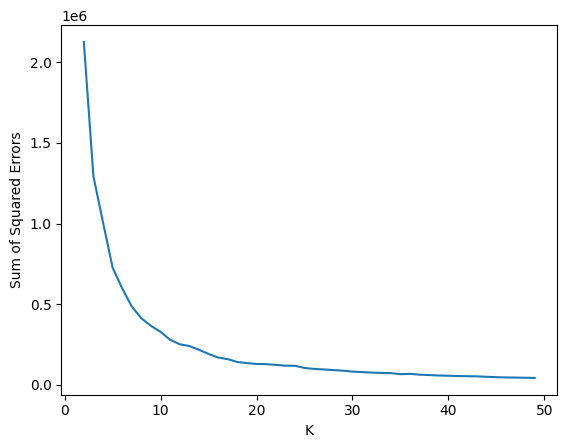

In [21]:
df = df_genre_adapted.drop(columns=['wikipedia_id' ])

X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(df)

plot_sse(X_reduced_tsne, start=2, end=50)

In [ ]:
labels = KMeans(n_clusters=11, random_state=13).fit_predict(X_reduced_tsne)
title = 'KMeans Clustering on t-SNE Reduced Data of Adapted Movies'

data = {
    'Dimension 1': X_reduced_tsne[:, 0],
    'Dimension 2': X_reduced_tsne[:, 1],
    'Label': labels,
    'MovieName': df_transformed_adapted['MovieName'],
    'Genre': genres
}
df = pd.DataFrame(data)

In [ ]:
labels = pd.Series(labels, name='Cluster')
genres = pd.Series(genres, name='Genres')
df = pd.concat([df_transformed_adapted, labels, genres], axis = 1)

Cluster
4     321
6     308
1     299
2     292
5     278
8     253
10    238
7     230
9     214
0     210
3     152
Name: count, dtype: int64

In [160]:
cluster_analysis = analysis_by_cluster(df)


['Western', 'Adventure', 'Action', 'Black-and-white', 'Action/Adventure']

In [161]:
cluster_analysis

,Average Box Office,Average Rating,Box Office Variance,Rating Variance,GenresList,ClusterSize
Cluster,,,,,,
0,6.903534e+07,6.480476,1.465179e+08,0.887041,"[Western, Adventure, Action, Black-and-white, ...",210
1,6.228390e+07,6.459532,9.396955e+07,1.008355,"[Drama, Adventure, Film adaptation, Action/Adv...",299
2,6.577511e+07,6.431849,1.262701e+08,0.927462,"[Thriller, Crime Fiction, Drama, Crime Thrille...",292
3,9.497363e+07,6.459868,1.667812e+08,0.948632,"[Drama, Romance Film, Romantic drama, Film ada...",152
4,7.715148e+07,6.438006,1.428921e+08,0.975058,"[Horror, Black-and-white, Thriller, Science Fi...",321
5,8.742517e+07,6.448201,1.217108e+08,0.931468,"[Drama, Black-and-white, Film adaptation, Crim...",278
6,7.989702e+07,6.518182,1.540857e+08,0.834161,"[Family Film, Adventure, Fantasy, Drama, Anima...",308
7,5.584443e+07,6.426522,8.786528e+07,1.007154,"[Drama, Family Film, Comedy, Family Drama, Adv...",230
8,8.442514e+07,6.467589,1.664959e+08,0.979379,"[Romance Film, Drama, Romantic drama, Comedy, ...",253
